### Assignment No- 1
### Name : Divya Tukaram Sale
### Roll No : 19121009
### Subject : Machine Learning
### Class : BE(Comp)

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Preprocessing the Dataset

### Load the Dataset

In [2]:
data= pd.read_csv("uber.csv")

In [3]:
#Display first five records
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#Display last fivr records
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
#Check null values
data.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
data.isnull().sum().sum()

2

In [8]:
data.dropna(inplace=True)
print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [9]:
#Checks data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [10]:
#Size of dataset
data.size

1799991

In [11]:
#Display shape of data
data.shape

(199999, 9)

## Identify Outliers

In [12]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
data.describe()[["fare_amount", "passenger_count"]]

,fare_amount,passenger_count
count,199999.000000,199999.000000
mean,11.359892,1.684543
std,9.901760,1.385995
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


## Visualize Outliers 

### 1. Using Histogram

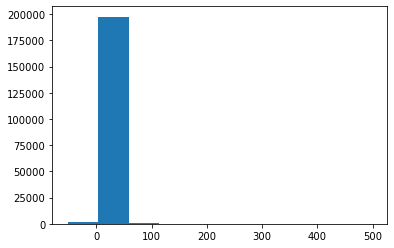

In [14]:
x="fare_amount"
fig = plt.hist(x=data["fare_amount"])

### 2.Scatter Plot

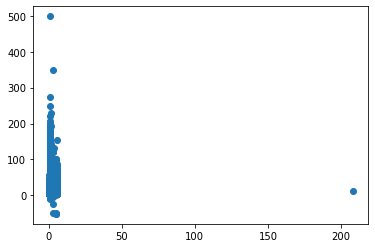

In [15]:
fig = plt.scatter(x=data["passenger_count"], y=data["fare_amount"])
#fig.show()

## Finding outliers using statistical methods

In [16]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [17]:
outliers = find_outliers_IQR(data["fare_amount"])

print("Number Of Outliers: "+ str(len(outliers)))

print("Max Outlier Value: "+ str(outliers.max()))

print("Min Outlier Value: "+ str(outliers.min()))

Number Of Outliers: 17166
Max Outlier Value: 499.0
Min Outlier Value: -52.0


In [18]:
outliers = find_outliers_IQR(data[["passenger_count","fare_amount"]])

In [19]:
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


## Check the Correlation

In [20]:
# Using kendall method
data.corr(method='kendall')

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000445,0.002127,0.001951,0.004414,0.001756,0.002569
fare_amount,0.000445,1.000000,0.027605,-0.051093,0.069115,-0.059964,0.018233
pickup_longitude,0.002127,0.027605,1.000000,0.397296,0.283662,0.152557,-0.012528
pickup_latitude,0.001951,-0.051093,0.397296,1.000000,0.139899,0.357189,-0.012212
dropoff_longitude,0.004414,0.069115,0.283662,0.139899,1.000000,0.366053,-0.009949
dropoff_latitude,0.001756,-0.059964,0.152557,0.357189,0.366053,1.000000,-0.006777
passenger_count,0.002569,0.018233,-0.012528,-0.012212,-0.009949,-0.006777,1.000000


In [21]:
# Using pearson method
data.corr(method ='pearson')

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


#### Correlation Using Visualization

<AxesSubplot:xlabel='fare_amount', ylabel='passenger_count'>

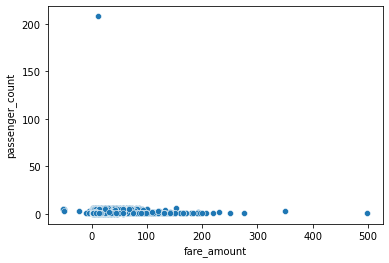

In [22]:
sns.scatterplot(x="fare_amount", y="passenger_count", data=data)

## Build the Models

### 1.Linear Regression

In [23]:
# we will keep only those rows where number of passangers are less than or equal to 8
data=data[data['passenger_count']<=8]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199998 non-null  int64  
 1   key                199998 non-null  object 
 2   fare_amount        199998 non-null  float64
 3   pickup_datetime    199998 non-null  object 
 4   pickup_longitude   199998 non-null  float64
 5   pickup_latitude    199998 non-null  float64
 6   dropoff_longitude  199998 non-null  float64
 7   dropoff_latitude   199998 non-null  float64
 8   passenger_count    199998 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [25]:
#Here key column and pickup_datetime columns are not needed as we have already created variables extracted from it
data.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199998 non-null  int64  
 1   fare_amount        199998 non-null  float64
 2   pickup_longitude   199998 non-null  float64
 3   pickup_latitude    199998 non-null  float64
 4   dropoff_longitude  199998 non-null  float64
 5   dropoff_latitude   199998 non-null  float64
 6   passenger_count    199998 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 12.2 MB


#### Divide data into input(X) and output(y)

In [27]:
x=data.drop("fare_amount", axis=1)
y=data['fare_amount']

In [29]:
print(data.shape)
print(x.shape)
print(y.shape)

(199998, 7)
(199998, 6)
(199998,)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199998 non-null  int64  
 1   fare_amount        199998 non-null  float64
 2   pickup_longitude   199998 non-null  float64
 3   pickup_latitude    199998 non-null  float64
 4   dropoff_longitude  199998 non-null  float64
 5   dropoff_latitude   199998 non-null  float64
 6   passenger_count    199998 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 12.2 MB


#### Divide Dataset into train and test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159998, 6)
(40000, 6)
(159998,)
(40000,)


#### Build a Model

In [34]:
Model=linear_model.LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [35]:
#Value of m
Model.coef_

array([ 6.23901490e-10,  5.52861778e-03,  5.73656718e-04, -5.87498729e-03,
       -1.71293924e-02,  8.01147240e-02])

In [36]:
#Value of C
Model.intercept_

11.842342203216147

In [37]:
predictedvalues = Model.predict(x_test)

In [38]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.999811144336848


In [40]:
print("R2 score is :",r2_score(y_test,predictedvalues))

R2 score is : 0.00035033874502798934


### 2.Random Forest Regression Models.

In [41]:
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [42]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [43]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  5.207187024426504


In [45]:
print("R2 score is :",r2_score(y_test,rfrmodel_pred))

R2 score is : 0.7289367882971021


### RMSE value for Linear Regression is 99.99 while RMSE value for Random forest regression is 52.07

### R2 score for Linear Regression is 35.03 while that for Random forest regression is 72.89